## Interpolação linear


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from interpolation import Interpolation
from scipy import special 

pi = np.pi
exp = np.exp
Erf = special.erf


### Constants, points, range, bins

In [9]:
#Constants:
sigma = 1.0
mi= 4

#Range and points:
n = 500 #number of points
bins = 10 #number of bins

#Spaces
x = np.linspace(-5, 5.0, num=n)
x_dist3 = np.linspace(1,7,num=n)
s_list =np.random.uniform(0.0, 1.0, n)

### Gaussian function

In [10]:
#Define the gaussian function:
def gauss (x):
    g =[]
        
    for j in range(0,len(x)): 
                
        g_i =  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow ((x[j] - mi) / sigma, 2.0))
        
        g.append(g_i)
    return g

f = gauss(x)


In [11]:
def dist3 (x):
    g =[]
    for j in range(0,len(x)): 
        g_j =  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow (((x[j] - mi) / sigma), 2.0))
        g_i=  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow (((x[j] + mi) / sigma), 2.0))
        a = Erf(mi / pow(2*sigma, 0.5))
        
        d = (g_j - g_i) / a
                
        g.append(d)
        
    return g

dist_3 = dist3(x_dist3)

In [12]:
point_teste = 2
dist1 = Interpolation(f, x)
d = dist1.interpolate()
inter = dist1.interpolated_point(point_teste)
print(inter)
f1 =  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow ((point_teste - mi) / sigma, 2.0))
print(f1)

0.053997808692861915
0.05399096651318806


In [13]:
cumul = dist1.cumulative(point_teste) 

cumul_all = dist1.cumulative_all_points()


In [14]:
sam_points = dist1.sampler_list_points(s_list)


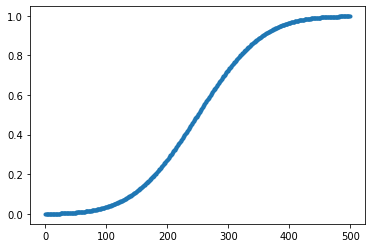

In [21]:
dist3 = Interpolation(dist_3, x_dist3)

cumul_3 = dist3.cumulative_all_points()
cumul_list =[]
for a in range(0, len(cumul_3)):
    cumul_list.append(cumul_3[a][0])
#print(cumul_3)
plt.plot(cumul_list, ".")